# Imports

In [264]:
data_path = 'data/hepatitis.data'

In [265]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)

# Load data

In [266]:
columns = ['class', 'age', 'sex', 'seroid', 'antviral',
           'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
           'spleen_palpable',  'spiders', 'ascites', 'varices', 'bilirubin', 
           'alk_phosphate', 'sgot', 'albumin', 'protime', 'histology']
columns_with_types = [['class', int], ['age', int], ['sex', int], ['seroid', int], ['antviral', int],
           ['fatigue', int], ['malaise', int], ['anorexia', int], ['liver_big', int], ['liver_firm', int],
           ['spleen_palpable', int],  ['spiders', int], ['ascites', int], ['varices', int], ['bilirubin', float], 
           ['alk_phosphate', float], ['sgot', float], ['albumin', float], ['protime', float], ['histology', int]]

columns_to_drop = ['alk_phosphate', 'protime']

df = pd.read_csv(data_path, names=columns)

## Sanitize data

In [267]:
df = df.replace(to_replace="?", value="-1")
df = df.reset_index(drop=True)

# convert 'Object' type to floats and ints'
for column in columns_with_types:
    col_name, col_type = column
    df[col_name] = df[col_name].astype(col_type)

# replace class marks
df.replace({1: 0, 2: 1}, inplace=True)

# replace empty cells with expected value for a given column
for column in columns_with_types:
    col_name, col_type = column
    expected_value = -1
    if col_type is float:
        sum = df[df[col_name].astype("float") >= 0.0].sum()[col_name]
        count = len(df[df[col_name].astype("float") >= 0.0])
        expected_value = sum / float(count)
    else:
        false_count = len(df[df[col_name] == 0])
        true_count = len(df[df[col_name] == 1])
        expected_value = 0 if false_count > true_count else 1
    df[col_name] = df[col_name].replace(to_replace=col_type(-1), value=expected_value)
    

# drop columns with many empty records
# df = df.drop(columns_to_drop, axis=1)

# divdie df to X and y sets
X = df.drop(['class'], axis=1)
y = df['class']

X.head(20)

,age,sex,seroid,antviral,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,30,1,0,1,1,1,1,0,1,1,1,1,1,0.00000,85.000000,18.00000,4.000000,61.852273,0
1,50,0,0,1,0,1,1,0,1,1,1,1,1,0.90000,135.000000,42.00000,3.500000,61.852273,0
2,78,0,1,1,0,1,1,1,1,1,1,1,1,0.70000,96.000000,32.00000,4.000000,61.852273,0
3,31,0,1,0,1,1,1,1,1,1,1,1,1,0.70000,46.000000,52.00000,4.000000,80.000000,0
4,34,0,1,1,1,1,1,1,1,1,1,1,1,0.00000,105.325397,200.00000,4.000000,61.852273,0
5,34,0,1,1,1,1,1,1,1,1,1,1,1,0.90000,95.000000,28.00000,4.000000,75.000000,0
6,51,0,0,1,0,1,0,1,1,0,0,1,1,1.20604,105.325397,85.89404,3.817266,61.852273,0
7,23,0,1,1,1,1,1,1,1,1,1,1,1,0.00000,105.325397,85.89404,3.817266,61.852273,0
8,39,0,1,1,0,1,1,1,0,1,1,1,1,0.70000,105.325397,48.00000,4.400000,61.852273,0
9,30,0,1,1,1,1,1,1,1,1,1,1,1,0.00000,105.325397,120.00000,3.900000,61.852273,0


# Features ranking

In [268]:
# use chi-squared test to make features ranking
chi2_selector = SelectKBest(chi2, k=X.shape[1])
chi2_selector.fit(X, y)

SelectKBest(k=19, score_func=<function chi2 at 0x14C027C8>)

## Ranking table

In [269]:
# create ranking table
chi2_scores = pd.DataFrame(list(zip(X.columns, chi2_selector.scores_)), columns=['feature', 'score'])
chi2_scores = chi2_scores.round(2)
chi2_scores = chi2_scores.sort_values('score', ascending=False)

## Bar plot

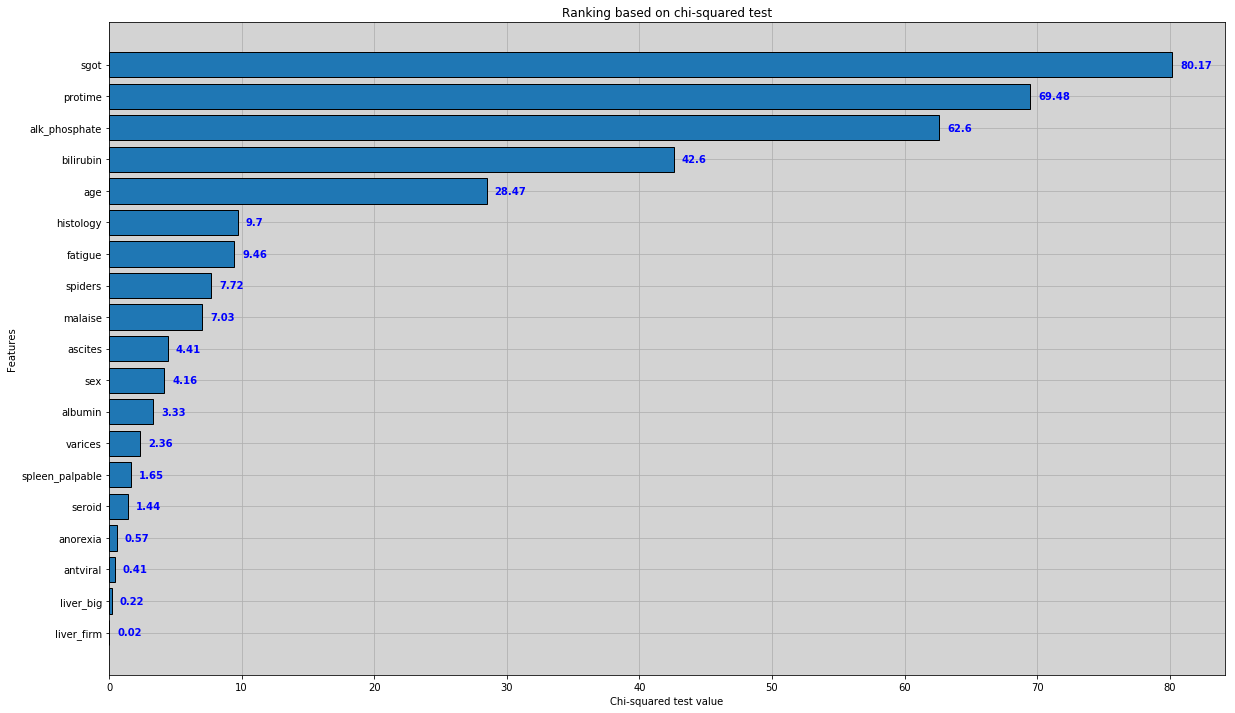

In [270]:
# display bar plot
plt.figure(figsize=(20,12))
plt.rcParams['axes.facecolor'] = 'lightgray'
plt.grid(zorder=0)
estimator_num = len(chi2_scores['feature'])

# sort ascending because horizontal bars print in reverse order
ascending_features = chi2_scores.sort_values('score', ascending=True)

# create horizontal bar plot
plt.barh(range(estimator_num), ascending_features['score'], align='center', zorder=3, edgecolor='black')

# label bars and axis
plt.yticks(range(estimator_num), ascending_features['feature'])
plt.title('Ranking based on chi-squared test')
plt.ylabel('Features')
plt.xlabel('Chi-squared test value')

# add scores at bars end
for i, v in enumerate(ascending_features['score']):
    plt.text(v + 0.6, i - 0.1, str(v), color='blue', fontweight='bold')

# save to file must be call before show
plt.savefig(fname='ranking.png', orientation='landscape')
plt.show()

In [271]:
# chi2_support = chi2_selector.get_support()
# chi2_feature = X.loc[:,chi2_support].columns.tolist()
# print(chi2_feature)

In [272]:
# X_norm_striped = MinMaxScaler().fit_transform(X[chi2_feature])
# df = pd.DataFrame(data=X[chi2_feature], columns=chi2_feature)
# df.head()